# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [ ]:
#! pip install tensorflow

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())

TensorFlow version: 2.9.1
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


# Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3)
(3000, 32, 32, 3) (3000, 3)


# Visualize Some Examples

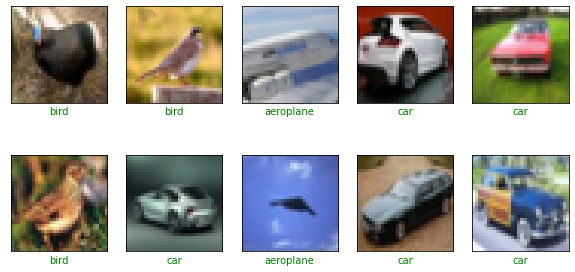

In [4]:
class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x,y,p):
    indices = np.random.choice(range(x.shape[0]),10,replace=False)
    
    x= x[indices]
    y= y[indices]
    p= p[indices]
    
    plt.figure(figsize=(10,5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col='green' if np.argmax (y[i])== np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color=col)
    plt.show()
    
show_random_examples(x_train,y_train,y_train)

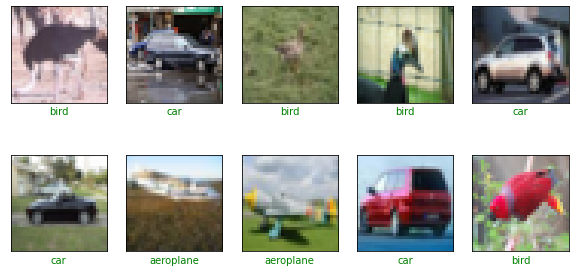

In [5]:
show_random_examples(x_test,y_test,y_test)

# Create Model

In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    
    model = add_conv_block(model,32)
    model = add_conv_block(model,64)
    model = add_conv_block(model,128)
    
    model.add(Flatten())
    model.add(Dense(3,activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam',
        metrics=['accuracy']
    )
    return model

model=create_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        1

# Train the Model

In [7]:
h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=10, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
            save_best_only=True, save_weights_only=False,
            monitor='val_accuracy'
        )
    ]
)

Epoch 1/10
118/118 [==============================] - 29s 240ms/step - loss: 0.9051 - accuracy: 0.6777 - val_loss: 2.5263 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 28s 240ms/step - loss: 0.5614 - accuracy: 0.7766 - val_loss: 2.6330 - val_accuracy: 0.5120
Epoch 3/10
118/118 [==============================] - 27s 232ms/step - loss: 0.4835 - accuracy: 0.8056 - val_loss: 2.1900 - val_accuracy: 0.4580
Epoch 4/10
118/118 [==============================] - 28s 240ms/step - loss: 0.4335 - accuracy: 0.8241 - val_loss: 1.8080 - val_accuracy: 0.4857
Epoch 5/10
118/118 [==============================] - 27s 231ms/step - loss: 0.4006 - accuracy: 0.8412 - val_loss: 0.6403 - val_accuracy: 0.7490
Epoch 6/10
118/118 [==============================] - 28s 238ms/step - loss: 0.3582 - accuracy: 0.8576 - val_loss: 0.4076 - val_accuracy: 0.8473
Epoch 7/10
118/118 [==============================] - 28s 234ms/step - loss: 0.3347 - accuracy: 0.8719 - val_loss: 0.4605 - val_ac

# Final Predictions

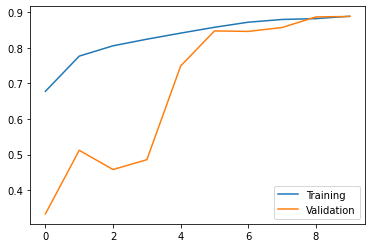

In [8]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()

In [9]:
model = tf.keras.models.load_model('models/model_0.888.h5') #choose from models folder created

In [10]:
preds = model.predict(x_test/255.)

94/94 [==============================] - 2s 23ms/step


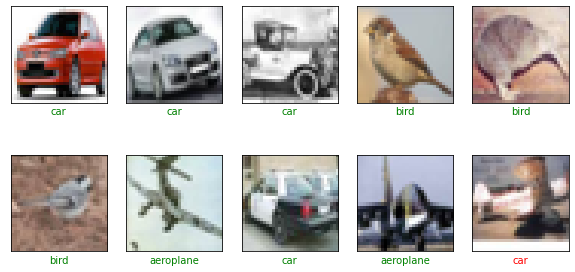

In [13]:
show_random_examples(x_test, y_test, preds)